## Initialisation

Import all the required library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

In [2]:
df = pd.read_csv("data/Customer-Churn.csv")

df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Preliminary Exploration

Rows and Columns

Info


In [5]:
# Dimensionality
df.shape

(7043, 21)

In [7]:
# Column names

df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [9]:
# Check for consistency and missing values amongst others

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### Data Cleaning

In [12]:
# Data  Cleaning

df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors = "coerce")

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [16]:
df[df["TotalCharges"].isna()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


### Statistical Analysis

Numerical Analysis

Categorical Analysis

In [19]:

df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [21]:
df.describe(include = "object")

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,7590-VHVEG,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,5174


### Visualisations

- Missing Numbers
- Different Analysis

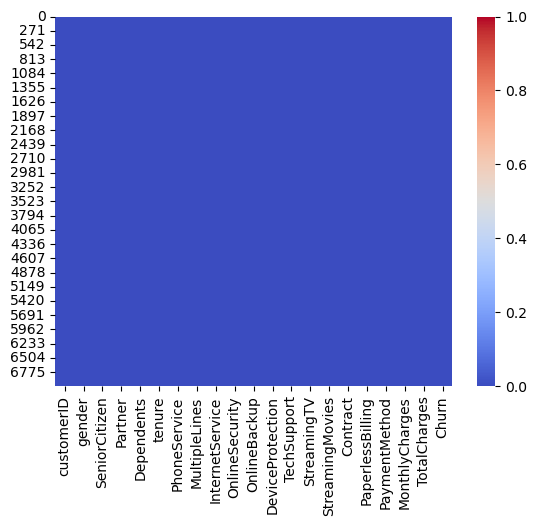

In [24]:
sns.heatmap(df.isna(), cmap = "coolwarm");

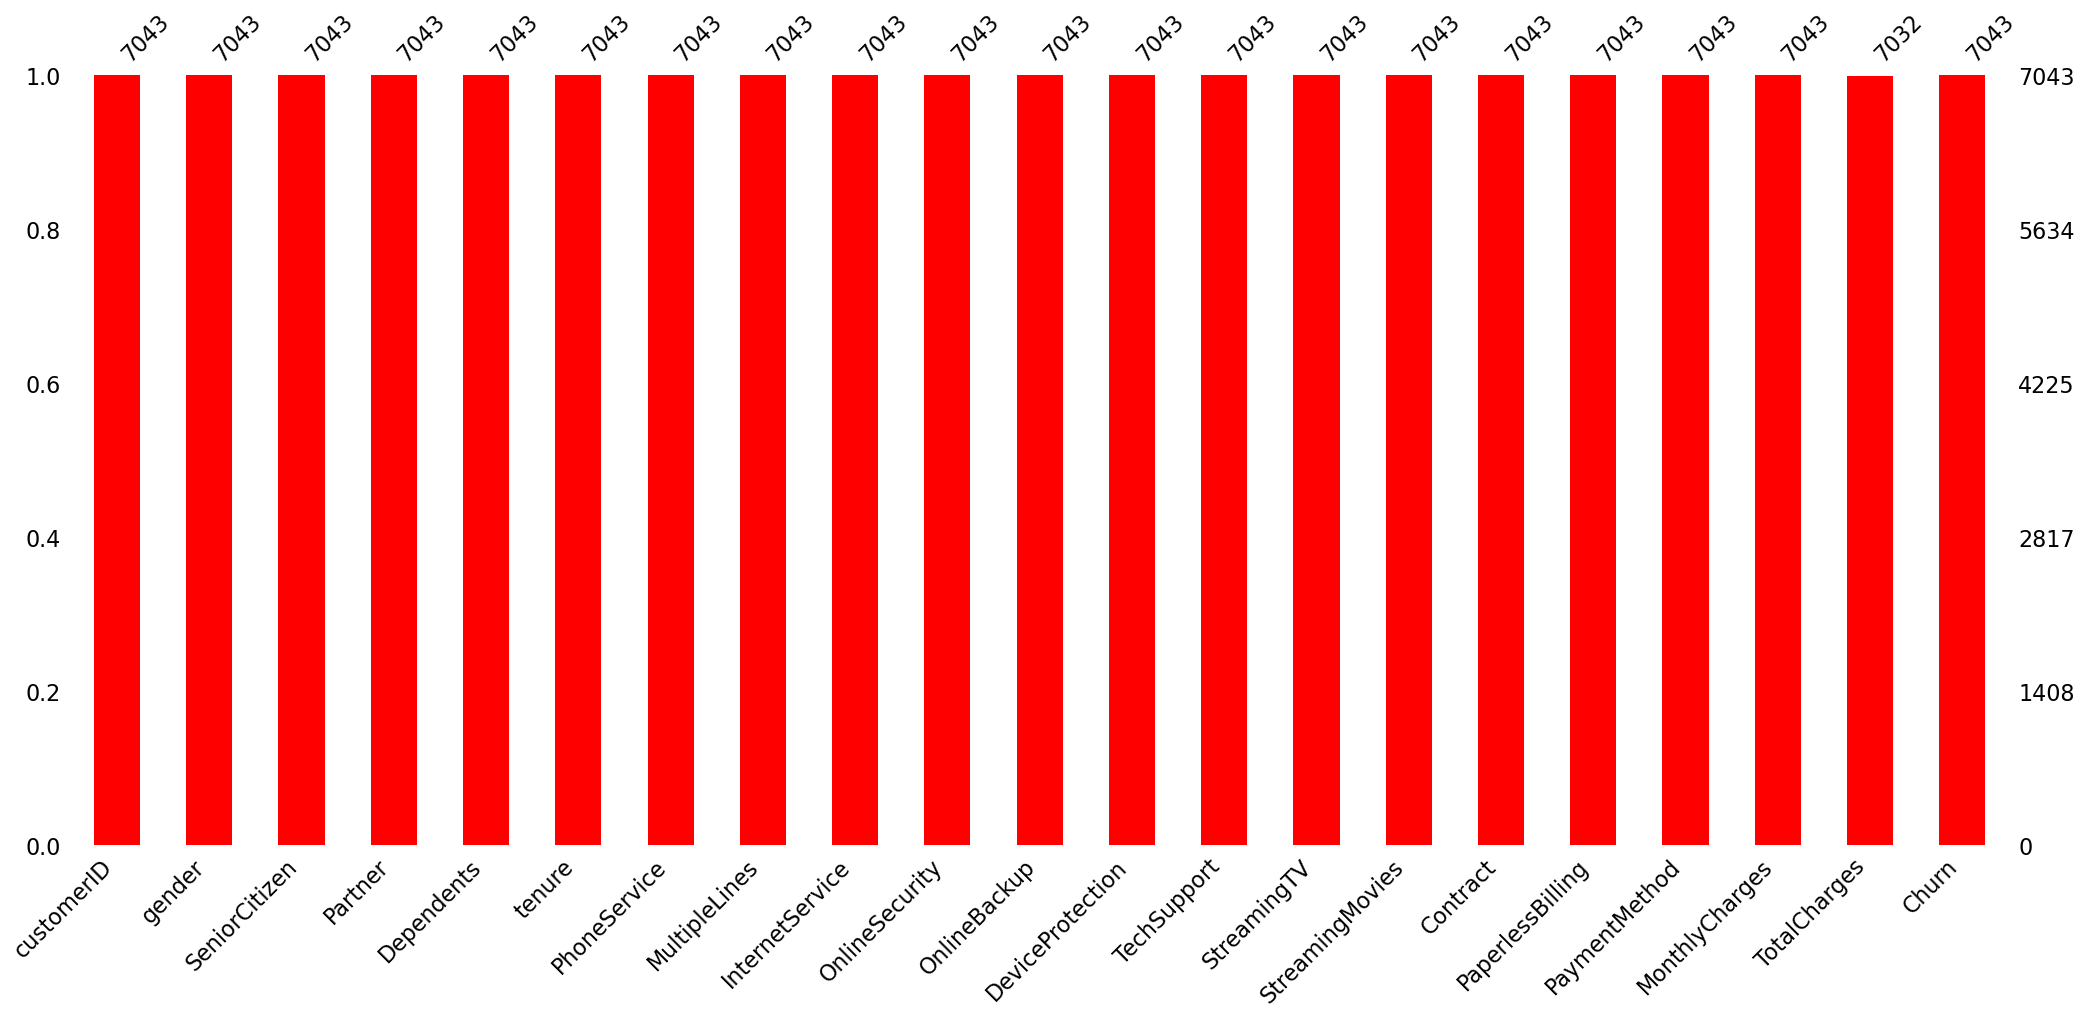

In [26]:
msno.bar(df, color = "red");

### Univariate Analysis

This helps analyse individual variables(columns)

Types of Chart to be used

#### Numerical 
----------------
- Boxplot 
- Histogram 
- Line Plot 
- Bar Plot 
- Pie Chart


In [28]:
# Check for Outliers

numeric_features = df.select_dtypes(exclude = "object")
category_features = df.select_dtypes(include = "object")

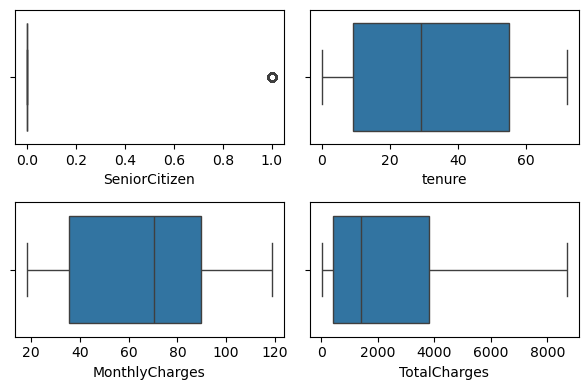

In [30]:
# Check for outliers
# Use Boxplot ( this allows for single column)
plt.figure(figsize=(6,4))

for i, column in enumerate(numeric_features, 1):
    plt.subplot(2,2,i)
    sns.boxplot(data = numeric_features, x = column)
plt.tight_layout()    
plt.show()

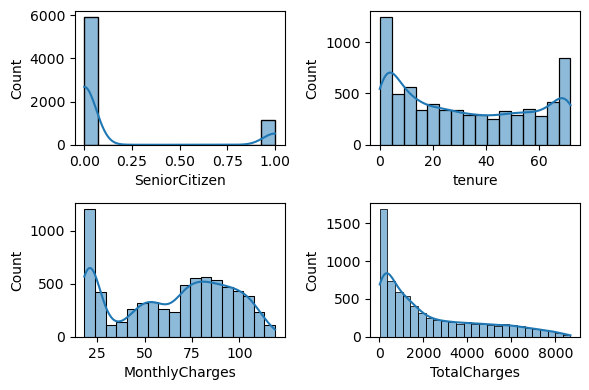

In [61]:

plt.figure(figsize=(6,4))

for i, column in enumerate(numeric_features, 1):
    plt.subplot(2,2,i)
    sns.histplot(data = numeric_features, x = column, kde = True)
plt.tight_layout()    
plt.show()

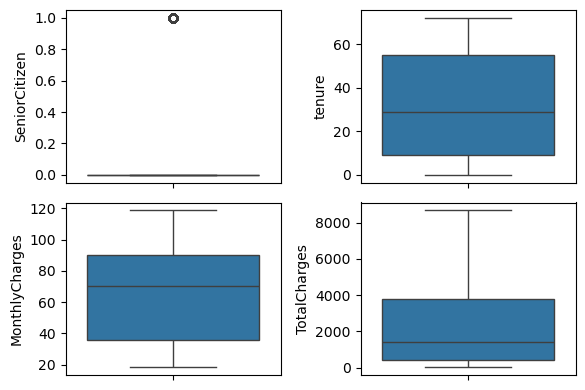

In [63]:
plt.figure(figsize=(6,4))

for i, column in enumerate(numeric_features, 1):
    plt.subplot(2,2,i)
    sns.boxplot(data = numeric_features, y = column)
    
plt.tight_layout()    
plt.show()

In [36]:
category_features.shape

(7043, 17)

In [38]:
category_features.drop(columns = "customerID", inplace = True)

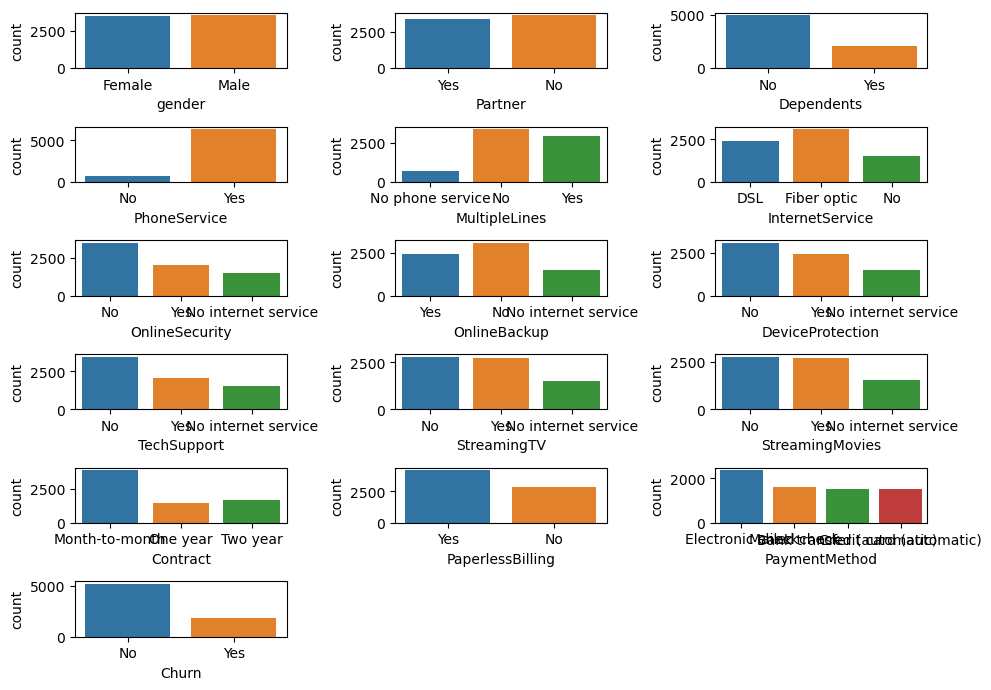

In [40]:
plt.figure(figsize=(10,7))

for i, column in enumerate(category_features, 1):
    plt.subplot(6,3,i)
    sns.countplot(data = category_features, x = column, hue=column)
    
plt.tight_layout()    
plt.show()

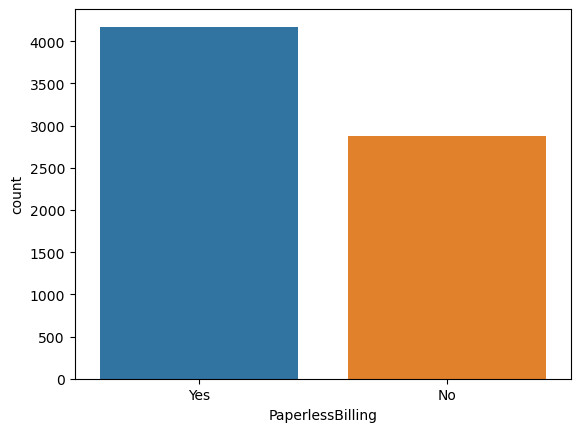

In [42]:
sns.countplot(data=category_features, x = "PaperlessBilling", hue = "PaperlessBilling");

### Bivariate Analysis

- Scatter plot
- Line Plot
- Bar Chart

Churn,No,Yes
gender,,
Female,2549,939
Male,2625,930


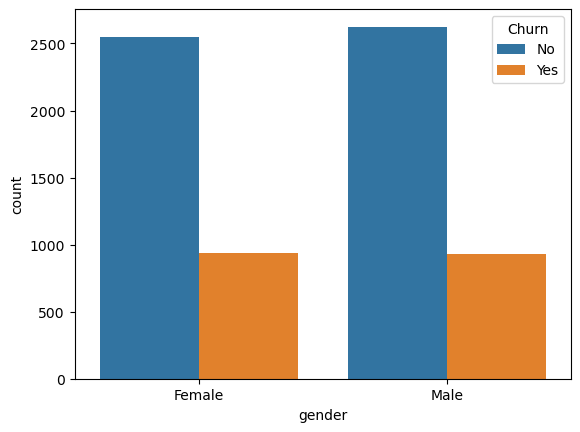

In [45]:
# Churn rate based on Gender

sns.countplot(data=category_features, x = "gender", hue = "Churn")

df.groupby(["gender", "Churn"]).size().unstack()

Churn,No,Yes
Contract,,
Month-to-month,2220,1655
One year,1307,166
Two year,1647,48


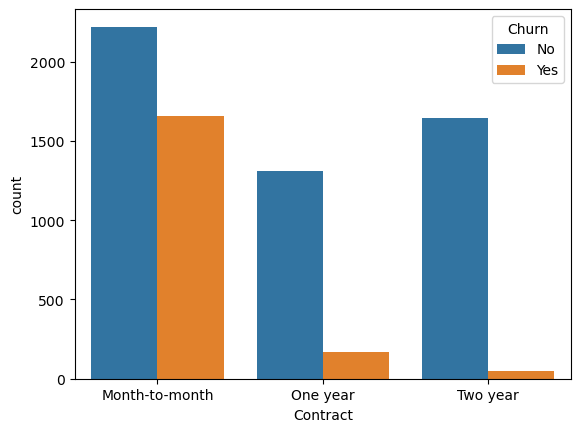

In [65]:
# Churn rate based on Contract Type

sns.countplot(data=category_features, x = "Contract", hue = "Churn")

df.groupby(["Contract", "Churn"]).size().unstack()

Churn,No,Yes
PaymentMethod,,
Bank transfer (automatic),1286,258
Credit card (automatic),1290,232
Electronic check,1294,1071
Mailed check,1304,308


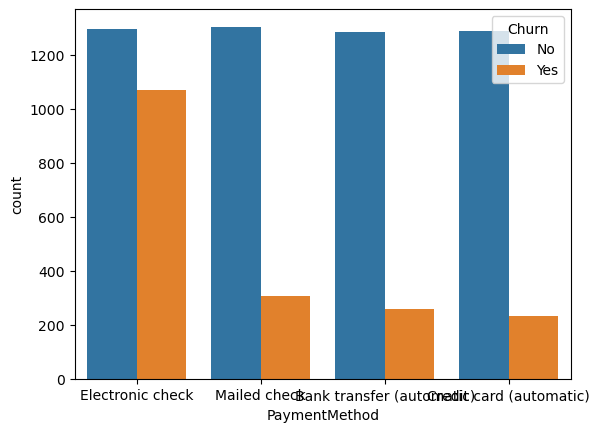

In [67]:
# Churn rate based on Payment method

sns.countplot(data=category_features, x = "PaymentMethod", hue = "Churn")

df.groupby(["PaymentMethod", "Churn"]).size().unstack()

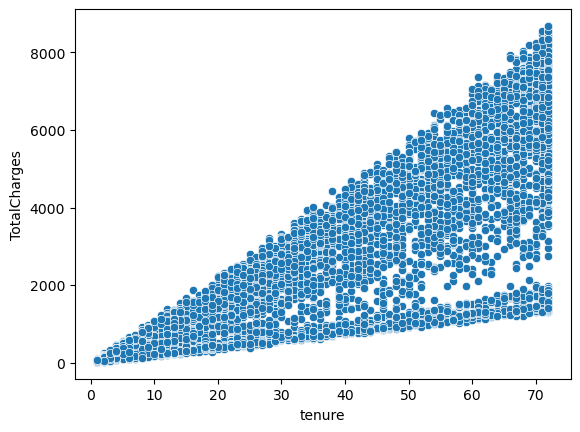

In [51]:
sns.scatterplot(data = numeric_features, y = "TotalCharges", x = "tenure");

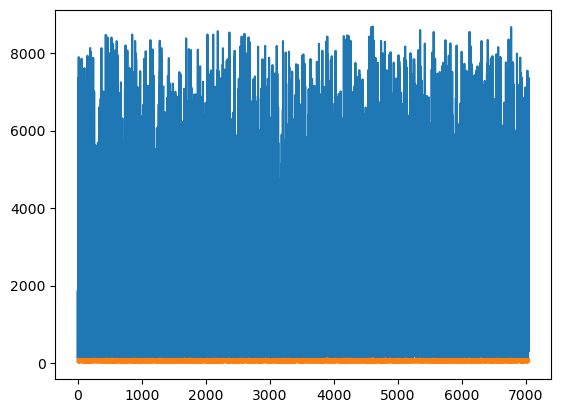

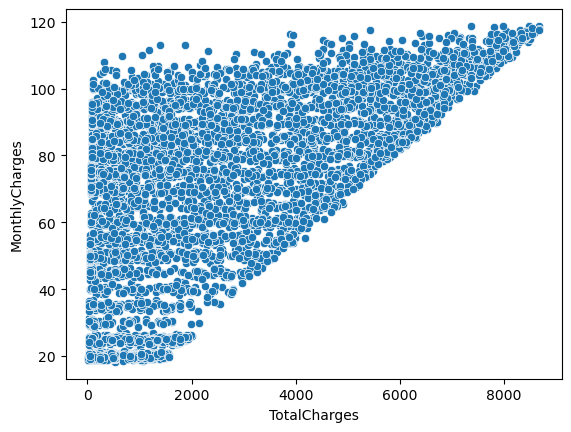

In [53]:
plt.plot(numeric_features.index, numeric_features["TotalCharges"])
plt.plot(numeric_features.index, numeric_features["MonthlyCharges"])
plt.show()

sns.scatterplot(data = numeric_features, x = "TotalCharges", y = "MonthlyCharges")
plt.show()

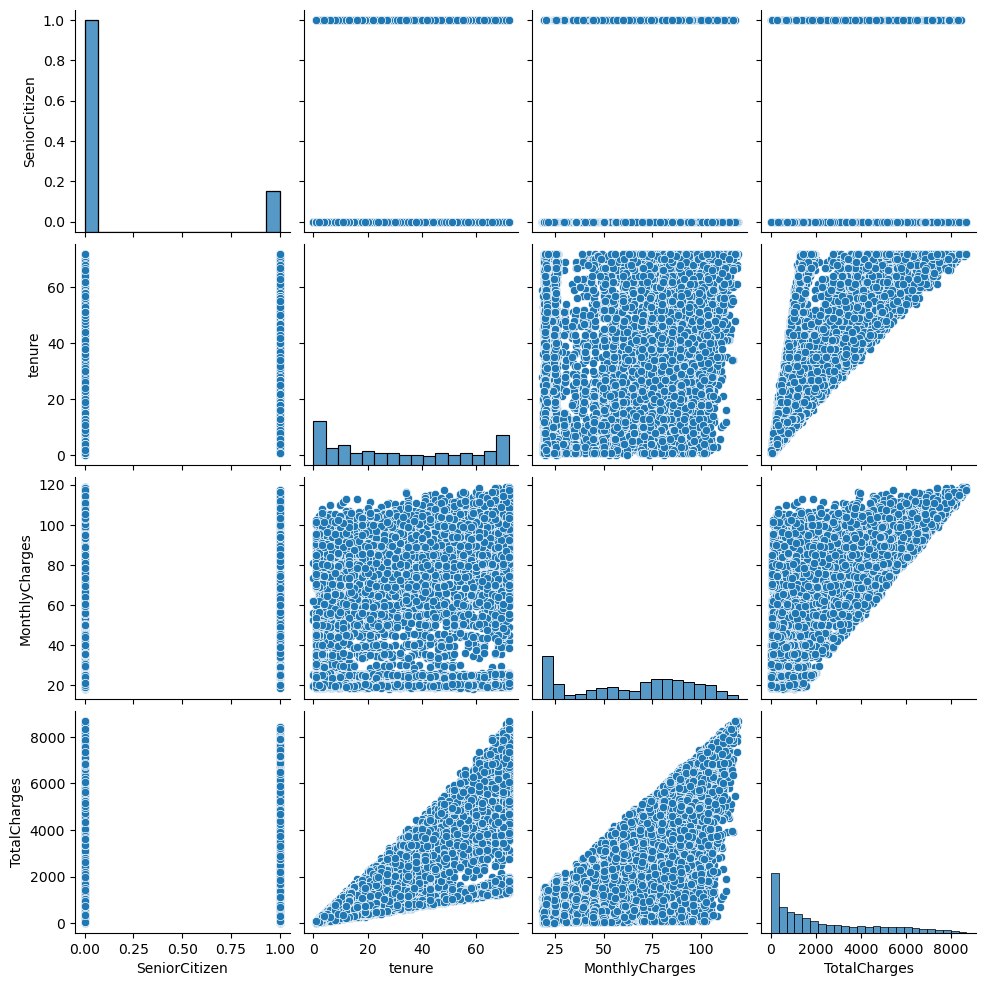

In [55]:
sns.pairplot(df);

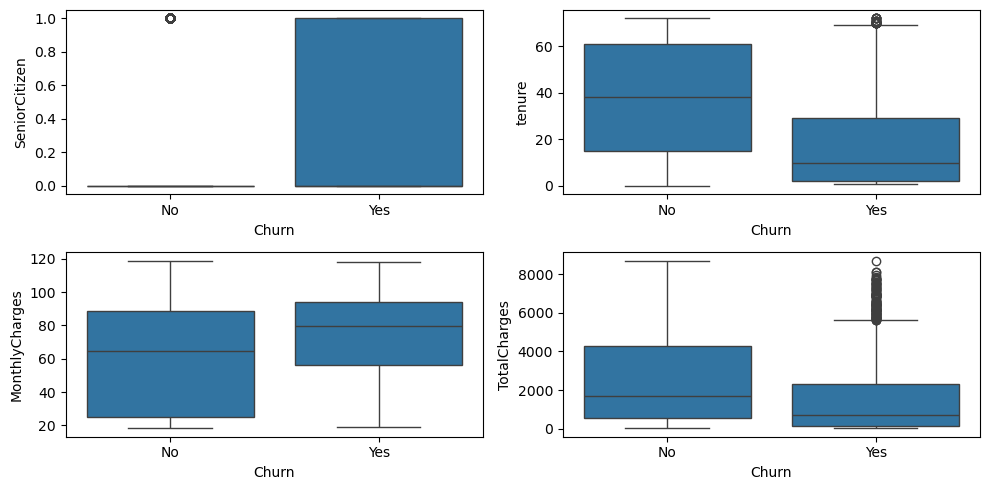

In [56]:
# Compare Catrgorical and Continuous

plt.figure(figsize=(10,5))

for i, column in enumerate(numeric_features, 1):
    plt.subplot(2,2,i)
    sns.boxplot(data = numeric_features, y = column, x = df["Churn"])
    
plt.tight_layout()    
plt.show()

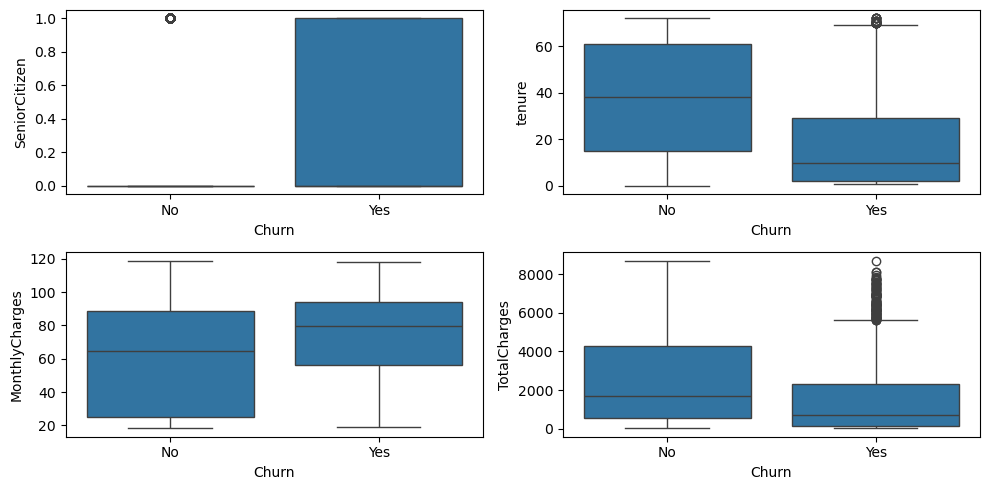

In [59]:
# Check how churn 

plt.figure(figsize=(10,5))

for i, column in enumerate(numeric_features, 1):
    plt.subplot(2,2,i)
    sns.boxplot(data = numeric_features, y = column, x = df["Churn"])
    
plt.tight_layout()    
plt.show()